# Geometric functions

### Tópics:

**1.** *Shift (Translation);*

**2.** *Rotation;*

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Original image

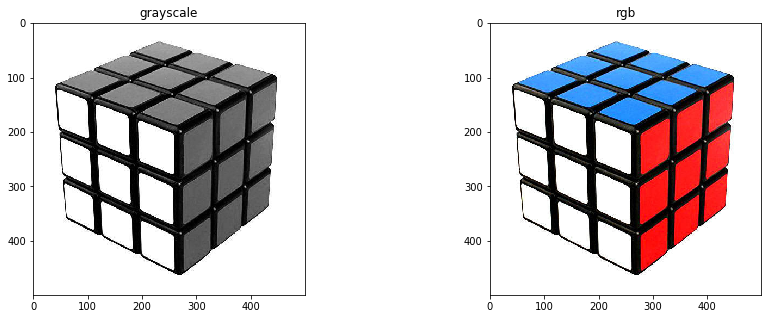

In [2]:
# global variables
absolute_path = os.path.join(os.path.dirname(os.getcwd()), 'imgs', 'cube.jpg');

# loading the image
img = cv2.imread(absolute_path,0)

plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.title("grayscale")
plt.imshow(img, cmap='gray')

img_rgb = cv2.imread(absolute_path,1)
plt.subplot(122)
plt.title("rgb")
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()

## Function definition

In [42]:
# x = horizontal
# y = vertical

def geometry(img, translation, multiplication, circular=False, rescale=False):
    # circulate does the pixels apear in the other side of the image
    # J(x,y) = I((x+x_sum)*x_multiply, (y+y_sum)*y_multiply)

    x_sum,  y_sum  = translation
    x_mult, y_mult = multiplication

    height, width = img.shape
    if rescale:
        height = int(height*y_mult)
        width  = int(width*x_mult)

    J = np.zeros((height, width))

    for x in range(len(J)):
        for y in range(len(J[x])):
            reference_x = int((x-x_sum)/x_mult)
            reference_y = int((y-y_sum)/y_mult)

            if circular:
                reference_x = height - reference_x if reference_x > height-1 else reference_x
                reference_y = width  - reference_y if reference_y > width-1  else reference_y
            else:
                reference_x = None if reference_x > height-1 or reference_x < 0 else reference_x
                reference_y = None if reference_y > width-1  or reference_y < 0 else reference_y
            
            J[x][y] = img[reference_x][reference_y] if reference_x != None and reference_y != None else 0

    return J

## Translation test

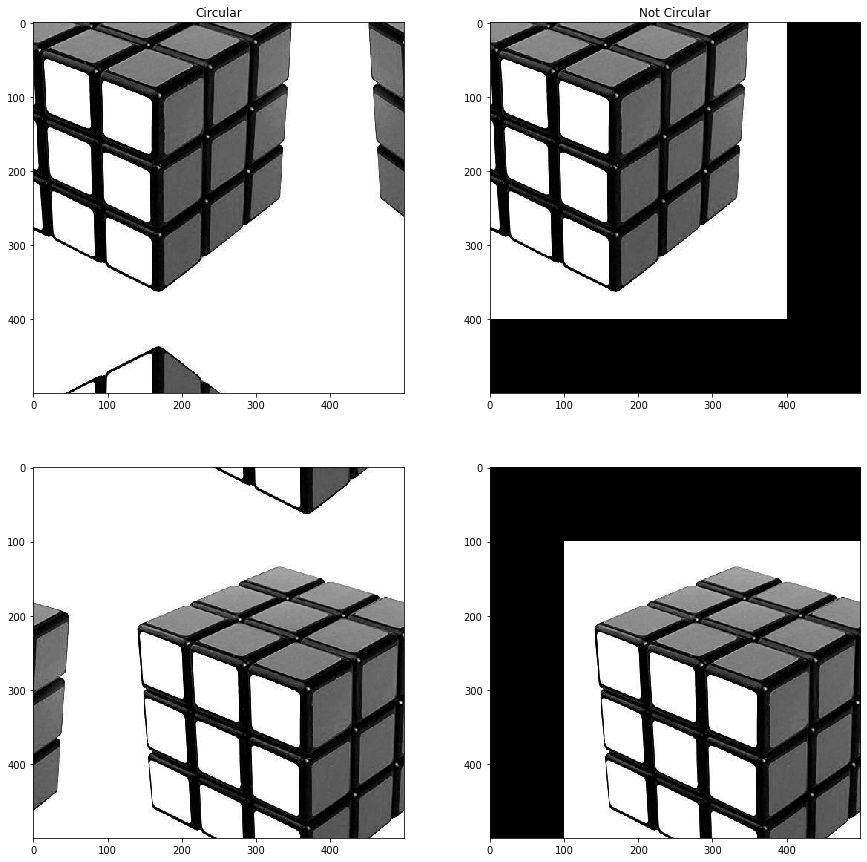

In [45]:
plt.figure(1,figsize=(15,15))

plt.subplot(221)
plt.title("Circular")
plt.imshow(geometry(img, (-100,-100), (1,1), circular=True), cmap='gray')

plt.subplot(222)
plt.title("Not Circular")
plt.imshow(geometry(img, (-100,-100), (1,1), circular=False), cmap='gray')

plt.subplot(223)
plt.imshow(geometry(img, (100,100), (1,1), circular=True), cmap='gray')

plt.subplot(224)
plt.imshow(geometry(img, (100,100), (1,1), circular=False), cmap='gray')

plt.show()

## Rotation test

IndexError: index 500 is out of bounds for axis 0 with size 500

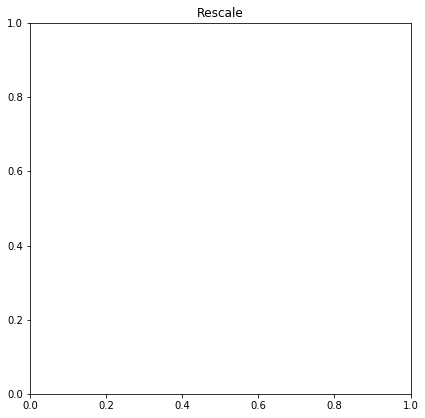

In [50]:
plt.figure(1,figsize=(15,15))

plt.subplot(221)
plt.title("Rescale")
plt.imshow(geometry(img, (0,0), (2,1), rescale=True), cmap='gray')

plt.subplot(222)
plt.title("Don't Rescale")
plt.imshow(geometry(img, (0,0), (1,1), rescale=False), cmap='gray')

plt.subplot(223)
plt.imshow(geometry(img, (0,0), (1,2), rescale=True), cmap='gray')

plt.subplot(224)
plt.imshow(geometry(img, (0,0), (1,1), rescale=False), cmap='gray')

plt.show()